In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans,MiniBatchKMeans
import matplotlib.cm as cm
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits,load_sample_image
from sklearn.manifold import TSNE,Isomap
from scipy.stats import mode
from sklearn.metrics import accuracy_score,homogeneity_score, completeness_score
%matplotlib inline

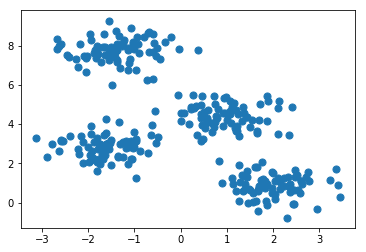

In [2]:
X, y = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

In [3]:
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(X)

In [4]:
np.bincount(y_kmeans)

array([75, 75, 75, 75], dtype=int64)

In [5]:
kmeans.cluster_centers_

array([[-1.37324398,  7.75368871],
       [ 1.98258281,  0.86771314],
       [ 0.94973532,  4.41906906],
       [-1.58438467,  2.83081263]])

In [6]:
def plot_clusters(data,clusters,y):
    plt.scatter(data[:, 0], data[:, 1], c=y, s=50, cmap='viridis')
    centers = clusters.cluster_centers_
    plt.scatter(centers[:,0], centers[:,1],
                c='black', s=200, alpha=0.5)

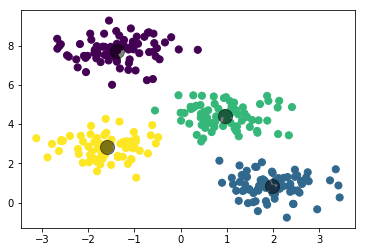

In [7]:
plot_clusters(X,kmeans,y_kmeans)

In [8]:
cancer_data = load_breast_cancer()

In [9]:
scaler = StandardScaler().fit(cancer_data.data)
X_cancer = scaler.transform(cancer_data.data)

In [10]:
kmeans = KMeans(n_clusters=2)
cancer_kmeans = kmeans.fit_predict(X_cancer)
kmeans.cluster_centers_


array([[-0.48299485, -0.23904142, -0.50041892, -0.47814154, -0.3110035 ,
        -0.52601873, -0.57903569, -0.58717117, -0.30908386, -0.1491409 ,
        -0.42798514, -0.02110994, -0.43097168, -0.40175149, -0.02383127,
        -0.37020054, -0.3345976 , -0.39771232, -0.07493017, -0.23682231,
        -0.51785387, -0.25147802, -0.53231144, -0.49935772, -0.31607814,
        -0.49224121, -0.53684332, -0.58010099, -0.30335497, -0.33672889],
       [ 0.93362406,  0.4620646 ,  0.96730462,  0.92424266,  0.60116657,
         1.01678879,  1.11927003,  1.13499581,  0.59745592,  0.28828783,
         0.82729086,  0.0408053 ,  0.83306382,  0.77658149,  0.0460656 ,
         0.71559384,  0.64677371,  0.76877382,  0.14483925,  0.45777508,
         1.00100618,  0.48610441,  1.02895252,  0.96525332,  0.61097579,
         0.95149718,  1.0377126 ,  1.12132923,  0.58638203,  0.65089347]])

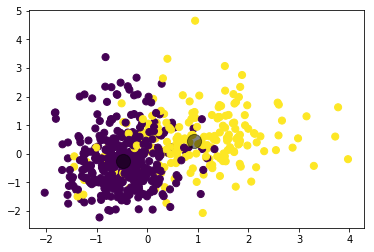

In [11]:
plot_clusters(X_cancer,kmeans,cancer_kmeans)

In [12]:
labels = np.zeros_like(cancer_kmeans)

In [13]:
cancer_kmeans.shape

(569,)

In [14]:
a = np.array([2,3,5,5,6,6,7,7,7,6,6,6,4,5])
mode(a)

ModeResult(mode=array([6]), count=array([5]))

## Homogeneity Score
A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class

## Completeness Score
A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster

In [15]:
def get_cluster_accuracy(target,clusters,numClasses):
    labels = np.zeros_like(clusters)
    for i in range(numClasses):
        mask = (clusters == i)
        labels[mask] = mode(target[mask])[0]
    
    return accuracy_score(target, labels),homogeneity_score(target, labels),completeness_score(target,labels)

In [16]:
get_cluster_accuracy(cancer_data.target,cancer_kmeans,2)

(0.9050966608084359, 0.5248878197516513, 0.5401465104108913)

In [17]:
digits = load_digits()
digits.data.shape
digits_data = digits.data/255

In [18]:
kmeans = KMeans(n_clusters=10, random_state=0)
digits_kmeans = kmeans.fit_predict(digits_data)
kmeans.cluster_centers_.shape

(10, 64)

In [19]:
digits_data.shape

(1797, 64)

In [20]:
digits_kmeans[:10]

array([5, 7, 7, 1, 0, 3, 9, 4, 3, 3])

In [21]:
get_cluster_accuracy(digits.target,digits_kmeans,10)

(0.7935447968836951, 0.7423769268336259, 0.7514312243853245)

In [22]:
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_projected = tsne.fit_transform(digits_data)


kmeans = KMeans(n_clusters=10, random_state=0)
digits_kmeans = kmeans.fit_predict(digits_projected)

get_cluster_accuracy(digits.target,digits_kmeans,10)

(0.9432387312186978, 0.9073036657419102, 0.9084709006934031)

In [23]:
tsne = TSNE(n_components=2, init='random', random_state=0)
cancer_projected = tsne.fit_transform(X_cancer)

kmeans = KMeans(n_clusters=2)
cancer_kmeans = kmeans.fit_predict(cancer_projected)

get_cluster_accuracy(cancer_data.target,cancer_kmeans,2)

(0.9261862917398945, 0.6399136796052645, 0.6216372247769649)

In [24]:
iso = Isomap(n_neighbors=5, n_components=2)
cancer_iso_projected = iso.fit_transform(X_cancer)
cancer_kmeans = kmeans.fit_predict(cancer_iso_projected)
get_cluster_accuracy(cancer_data.target,cancer_kmeans,2)

(0.9332161687170475, 0.6343604044495395, 0.6602079836771583)

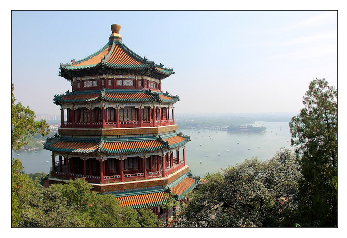

In [25]:
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)

In [26]:
china.shape

(427, 640, 3)

In [27]:
data = china / 255.0 
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [28]:
kmeans = MiniBatchKMeans(100)
kmeans.fit(data)


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10,
        n_clusters=100, n_init=3, random_state=None,
        reassignment_ratio=0.01, tol=0.0, verbose=0)

In [29]:
kmeans.cluster_centers_.shape

(100, 3)

In [30]:
preds = kmeans.predict(data)

In [31]:
preds.shape

(273280,)

In [32]:
new_image = kmeans.cluster_centers_[preds]

In [33]:
new_image.shape

(273280, 3)

Text(0.5,1,'100-color Image')

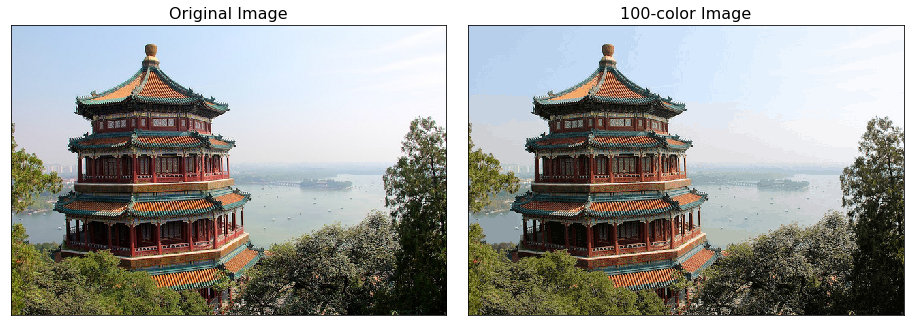

In [34]:
china_clustered = new_image.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_clustered)
ax[1].set_title('100-color Image', size=16)